<a href="https://colab.research.google.com/github/raulsa15/design/blob/main/Aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from zipfile import ZipFile

Listar arquivos em csv na lista da olist

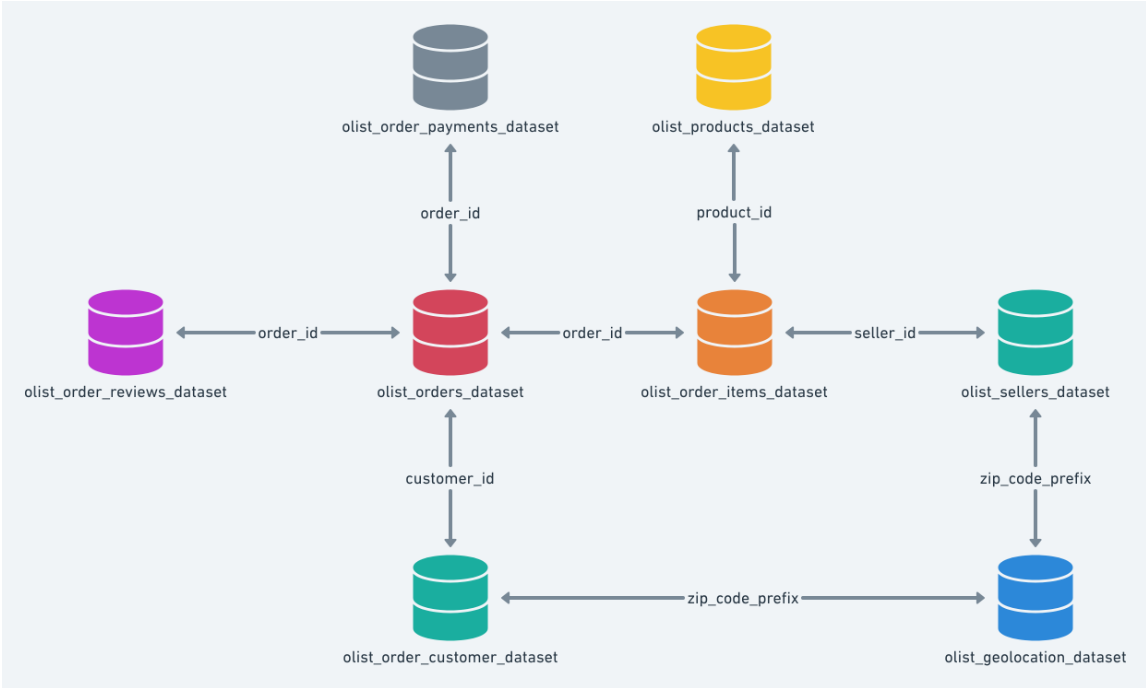



In [3]:
zf = ZipFile('olist.zip')
zf.namelist()

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

In [4]:
# now read your csv file 
df_orders = pd.read_csv(zf.open('olist_orders_dataset.csv'))
df_orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [5]:
df_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Pesquisar ordens que não foram entregues (order_status) e pesquisar por valores vazios

In [6]:
df_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [7]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [8]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
2965/df_orders.shape[0]

0.02981667521444877

In [10]:
df_orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [11]:
mask=df_orders.order_delivered_customer_date.isna()

In [12]:
df_orders[mask]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [13]:
df_orders[mask].order_status.value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

In [14]:
df_orders=df_orders.dropna()

In [15]:
df_orders.shape

(96461, 8)

In [16]:
df_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,95939,88272,80100,95649,445
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96455,3,9,47,3,507


In [17]:
df_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [18]:
df_orders.order_purchase_timestamp=pd.to_datetime(df_orders.order_purchase_timestamp)

In [19]:
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
dtype: object

In [20]:
df_orders.customer_id.value_counts()

9ef432eb6251297304e76186b10a928d    1
110b79f06a0f49a38da99084706a382d    1
c840e43d3d57dbb4e99374570f2488cd    1
96c6a3143d7cc33bbebf14ab6abed0ce    1
eb4350b67a0264c67e5e06a038e4afbb    1
                                   ..
7db5bde0f0fcee8817a4c317cf05429a    1
0b8520e0d24d4e14482e01e73e5740c0    1
a33988fde632872a5c5458823b9c2d01    1
42f104a41e8e13c7eaaa9d8e11e7c7f5    1
edb027a75a1449115f6b43211ae02a24    1
Name: customer_id, Length: 96461, dtype: int64

customer_id não é específico por pedido, não por cliente, o cliente deve ser encontrado numa outra base do zip

problema está na base de geolocalização, aggregate função será importante.

broadcast é uma função importante para trabalhar com join em grandes bases de dados (spark)

In [21]:
zf.namelist()

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

1 Quantas linhas temos na tabela 'olist_orders_dataset.csv'?
2 Quantas linhas temos na tabela 'olist_order_items_dataset.csv'?
3 Quantas linhas temos na tabela 'olist_customers_dataset.csv'?
4 Quantas linhas temos na tabela 'olist_sellers_dataset.csv'?
5 Quantas linhas temos na tabela 'olist_products_dataset.csv'?
6 Quantas linhas temos na tabela 'olist_order_payments_dataset.csv'?
7 Quantas linhas temos na tabela 'olist_order_reviews_dataset.csv'?
8 Quantas linhas temos na tabela 'olist_geolocation_dataset.csv'?

In [22]:
for name in zf.namelist():
  df = pd.read_csv(zf.open(name))
  x=len(df)
  print(name,x)

olist_customers_dataset.csv 99441
olist_geolocation_dataset.csv 1000163
olist_order_items_dataset.csv 112650
olist_order_payments_dataset.csv 103886
olist_order_reviews_dataset.csv 99224
olist_orders_dataset.csv 99441
olist_products_dataset.csv 32951
olist_sellers_dataset.csv 3095
product_category_name_translation.csv 71


9 Quantos CEPS únicos temos no banco de dados?

In [23]:
df_geolocation = pd.read_csv(zf.open('olist_geolocation_dataset.csv'))
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [24]:
len(df_geolocation['geolocation_zip_code_prefix'].unique())

19015

10 Quantas latitudes e longitudes estão expressas na base de dados?

In [25]:
len(df_geolocation['geolocation_lat'].unique())

717360

In [26]:
len(df_geolocation['geolocation_lng'].unique())

717613

11 Crie um método para agrupar todas as diferentes latitudes e longitudes que um determinado CEP possui para um valor único por CEP. Dica Use a função group_by e aggragate

In [27]:
df_geolocation.groupby('geolocation_zip_code_prefix').agg('median')

,geolocation_lat,geolocation_lng
geolocation_zip_code_prefix,,
1001,-23.550381,-46.634027
1002,-23.548551,-46.635072
1003,-23.548977,-46.635313
1004,-23.549535,-46.634771
1005,-23.549612,-46.636532
...,...,...
99960,-27.953797,-52.029641
99965,-28.179542,-52.035551
99970,-28.343273,-51.873734


12 Crie um método para agregar todas as tabelas disponíveis em uma única tabela

In [28]:
df_items=pd.read_csv(zf.open('olist_order_items_dataset.csv'))
df_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [29]:
df_payments=pd.read_csv(zf.open('olist_order_payments_dataset.csv'))
df_payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [30]:
df_reviews=pd.read_csv(zf.open('olist_order_reviews_dataset.csv'))
df_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [31]:
df_products=pd.read_csv(zf.open('olist_products_dataset.csv'))
df_products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [32]:
df_sellers=pd.read_csv(zf.open('olist_sellers_dataset.csv'))
df_sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [33]:
df_category=pd.read_csv(zf.open('product_category_name_translation.csv'))
df_category.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


12 Crie um método para agregar todas as tabelas disponíveis em uma única tabela.

13 Quantas ordens distintas temos em nosso banco de dados?

In [41]:
len(df_orders.order_id.unique())

96461

14 Quantos clientes distintos existem em nosso banco de dados?

In [49]:
len(df_orders.customer_id.unique())

96461

15 Quantos vendedores distintos existem em nosso bando de dados?

In [44]:
len(df_sellers.seller_id.unique())

3095

16 Qual a porcentagem de vendas feitas com cartão de crédito?

In [48]:
df_payments.payment_type.value_counts(normalize=True)

credit_card    0.739224
boleto         0.190440
voucher        0.055590
debit_card     0.014718
not_defined    0.000029
Name: payment_type, dtype: float64